In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import kerasNN
import datacontrol
import validation
import itertools

Using TensorFlow backend.


In [53]:
models = [ [200,200,200], [500,500,500], [200,200,200,200], [500,500,500, 500], [500,500,500, 500, 500], [1000,1000,1000, 1000],
          [1000,1000,1000, 1000], [1000,1000,1000, 1000, 1000],  [1000, 1000, 1000, 1000, 1000, 1000] ]
activation = ["relu"]
TrainingData = datacontrol.readFile("../data/ML-CUP18-TR.csv")
X, Y = datacontrol.divide(TrainingData)

In [54]:
results = []
for i in itertools.product(models, activation):
    print(i)
    NN = kerasNN.KerasNN(NetworArchitecture = i[0], activation = i[1], epochs = 1500, eta = 0.001, momentum = 0.5)
    val, train = NN.trainCV(X, Y )
    results.append([*val, *train, i[0], i[1]])

([200, 200, 200], 'relu')
kerasNN


 Time: 272.90
0.96 (+/- 0.07)
0.68 (+/- 0.03)
([500, 500, 500], 'relu')
kerasNN


 Time: 509.39
0.92 (+/- 0.08)
0.63 (+/- 0.03)
([200, 200, 200, 200], 'relu')
kerasNN


 Time: 309.63
0.81 (+/- 0.12)
0.42 (+/- 0.04)
([500, 500, 500, 500], 'relu')
kerasNN


 Time: 637.11
0.81 (+/- 0.13)
0.45 (+/- 0.05)
([500, 500, 500, 500, 500], 'relu')
kerasNN


 Time: 765.51
0.70 (+/- 0.12)
0.29 (+/- 0.06)
([1000, 1000, 1000, 1000], 'relu')
kerasNN


 Time: 1735.07
0.74 (+/- 0.11)
0.36 (+/- 0.03)
([1000, 1000, 1000, 1000], 'relu')
kerasNN


 Time: 1733.18
0.77 (+/- 0.10)
0.41 (+/- 0.04)
([1000, 1000, 1000, 1000, 1000], 'relu')
kerasNN


 Time: 2311.24
0.68 (+/- 0.13)
0.28 (+/- 0.03)
([1000, 1000, 1000, 1000, 1000, 1000], 'relu')
kerasNN


 Time: 2808.75
0.65 (+/- 0.14)
0.25 (+/- 0.09)


In [55]:
newresults = []
for i in results:
    newresults.append([np.mean(np.array(i[:3])),np.mean(np.array(i[4:7])),  i[8], i[9]])
df = pd.DataFrame(newresults)

In [41]:
df.to_csv("NoneNone.csv")
df = pd.read_csv("NoneNone.csv")

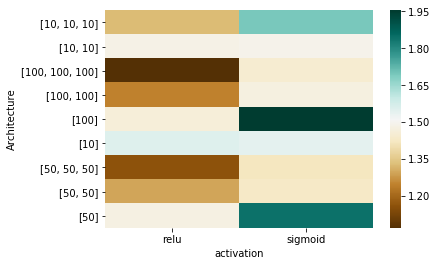

In [26]:
df = df.rename(index=str, columns={"0": "mean Validation Error", "2": "Architecture", "3":"activation"})
df = df.pivot("Architecture", "activation", "mean Validation Error")
ax = sns.heatmap(df, cmap="BrBG")

In [50]:
NN = kerasNN.KerasNN(NetworArchitecture =[1000, 1000, 1000, 1000, 1000, 1000], activation = "relu", eta = 0.001, momentum = 0.1, epochs = 2000)
val, train = NN.trainCV(X, Y,plot = True )

kerasNN



KeyboardInterrupt: 

In [62]:
df

,0,1,2,3
0,0.927361,0.689532,"[200, 200, 200]",relu
1,0.882908,0.632698,"[500, 500, 500]",relu
2,0.743649,0.438037,"[200, 200, 200, 200]",relu
3,0.744350,0.435208,"[500, 500, 500, 500]",relu
4,0.628572,0.308385,"[500, 500, 500, 500, 500]",relu
5,0.673241,0.362258,"[1000, 1000, 1000, 1000]",relu
6,0.710284,0.421346,"[1000, 1000, 1000, 1000]",relu
7,0.609913,0.283875,"[1000, 1000, 1000, 1000, 1000]",relu
8,0.578564,0.264202,"[1000, 1000, 1000, 1000, 1000, 1000]",relu


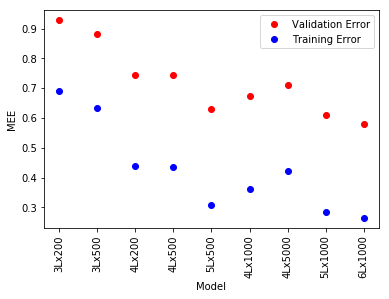

In [76]:
import matplotlib.pyplot as plt
models = [ "3Lx200", "3Lx500", "4Lx200", "4Lx500", "5Lx500", "4Lx1000",
          "4Lx5000", "5Lx1000",  "6Lx1000" ]
plt.plot(models, df[0], 'ro', label = "Validation Error")
#plt.plot(models, df[0], 'ro',models, df[1],'bo')
plt.plot(models, df[1], 'bo', label = "Training Error")
plt.xlabel("Model")
plt.tick_params(axis='x', rotation=90)
plt.ylabel("MEE")
plt.legend()